# SVC

## 1.) Linear SVC in case of linear separation
load the Wine dataset (can be found in sklearn API) (sklearn.datasets.load_wine)
scale the data and plot the flavanoids vs hue in a scatterplot colored with the target, where the target should be class_0 and class_2, so class_1 left out
train an SVC model with linear kernel with default parameter settings, but once with C=0.1 and then C=1000
visualize the model's decision boundary and the margins based on the coefficients learnt by the model
interpret the results, what is the role of the C hyperparameter?

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [88]:
# Load wine data
wine_dataset = datasets.load_wine()


X = wine_dataset.data
y = wine_dataset.target
y_names = wine_dataset.target_names
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [89]:
standardscaler = StandardScaler()
X = standardscaler.fit_transform(X)
X

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [90]:
wine_dataset.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [91]:
 flavanoids = wine_dataset.feature_names.index("flavanoids")
 hue = wine_dataset.feature_names.index("hue")
 print(flavanoids,hue)

6 10


In [92]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [93]:
y_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [94]:
y_new = [x for x in y if x != 1]
y_new

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [95]:
X_new = pd.DataFrame(X)[[hue,flavanoids]].iloc[[index for index,x in enumerate(y) if x != 1]]
X_new

,10,6
0,0.362177,1.034819
1,0.406051,0.733629
2,0.318304,1.215533
3,-0.427544,1.466525
4,0.362177,0.663351
...,...,...
173,-1.392758,-1.424900
174,-1.129518,-1.284344
175,-1.612125,-1.344582
176,-1.568252,-1.354622


In [96]:
len(y_new)

107

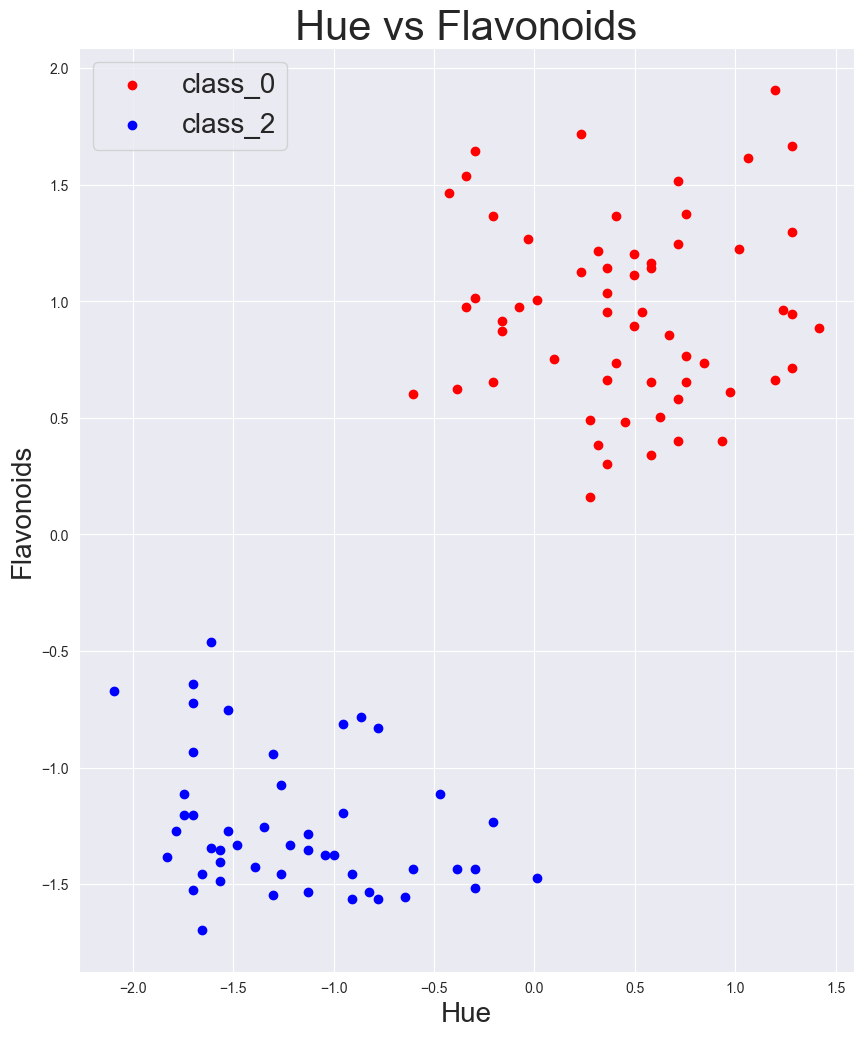

In [97]:
# Extract the required data from whole data
hue_values = X_new[hue].values
flavanoids_values = X_new[flavanoids].values

# Plot petal length against petal width
fig, ax = plt.subplots(figsize=(10, 12))

colors = ['red', 'blue']
y_names_new = [i for i in y_names if i != "class_1"]

# Loop through from 0 to 2 since labels are encoded in this way in y and through colors at once
for label, color in zip(y_names_new, colors):
    coor = [index for index,i in enumerate(y_new) if  i == int(label.split("_")[1])]
    # plot only those data rows where there is data according to actual label
    ax.scatter(hue_values[coor],
             flavanoids_values[coor],
             label=label,
             c=color)


ax.set_title('Hue vs Flavonoids', fontsize=30)
ax.set_xlabel('Hue', fontsize=20)
ax.set_ylabel('Flavonoids', fontsize=20)

ax.legend(loc='upper left', fontsize=20)
plt.show()

In [98]:
# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state = 1)

In [99]:
# Create linear svc object when C is 0.1
lin_svc = SVC(kernel='linear', C=0.1)
lin_svc.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

In [100]:
lin_svc.coef_

array([[-0.44714747, -0.90115024]])

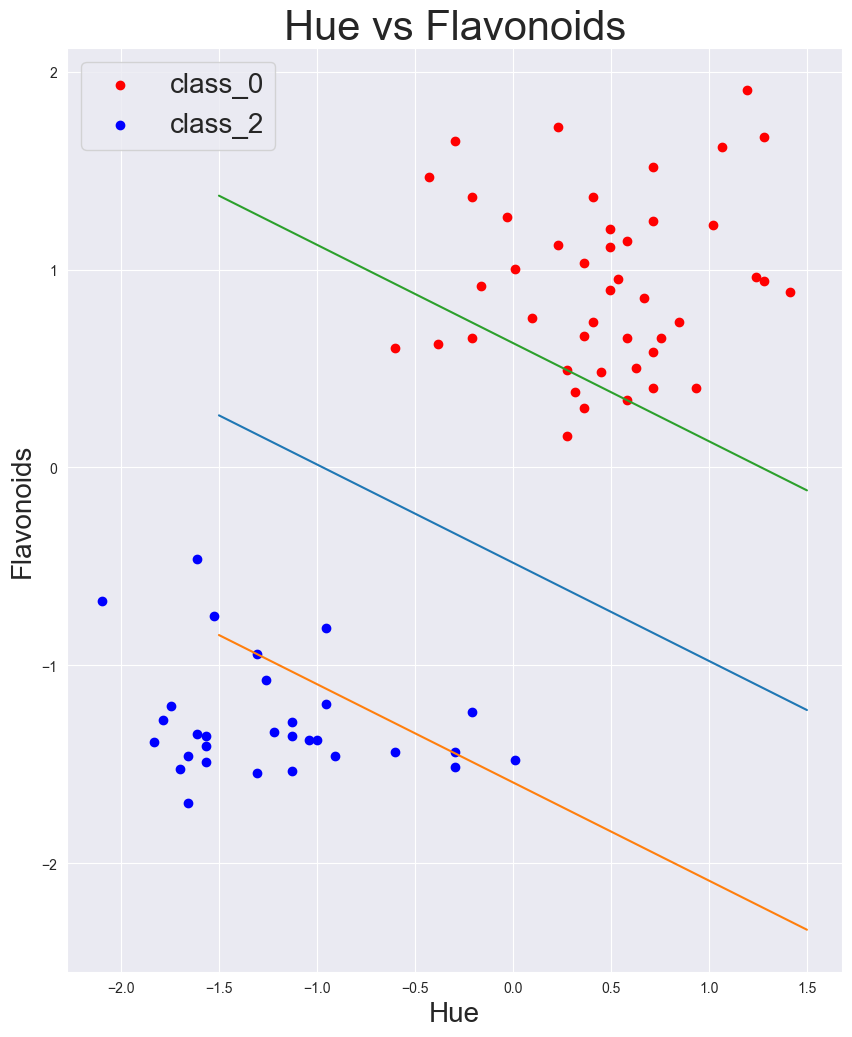

In [101]:
fig, ax = plt.subplots(figsize=(10, 12))

colors = ['red', 'blue', 'green']

hue_train = X_train[hue].values
flavanoids_train = X_train[flavanoids].values

# Loop through from 0 to 2 since labels are encoded in this way in y and through colors at once
for label, color in zip(y_names_new, colors):
    coor = [index for index,i in enumerate(y_train) if  i == int(label.split("_")[1])]
    # plot only those data rows where there is data according to actual label
    ax.scatter(hue_train[coor],
             flavanoids_train[coor],
             label=label,
             c=color)


ax.set_title('Hue vs Flavonoids', fontsize=30)
ax.set_xlabel('Hue', fontsize=20)
ax.set_ylabel('Flavonoids', fontsize=20)

# First 2 class
w = lin_svc.coef_[0]
b = lin_svc.intercept_[0]
a = -w[0]/w[1]
x_points = np.linspace(-1.5, 1.5)
#y_points = -(w[0]/w[1])*x_points-b/w[1]
y_points = a * x_points - (b/w[1])
ax.plot(x_points, y_points)

margin = 1/np.sqrt(np.sum(lin_svc.coef_ ** 2))
y_points_down = y_points - np.sqrt(1 + a ** 2) * margin
y_points_up = y_points + np.sqrt(1 + a ** 2) * margin
ax.plot(x_points, y_points_down)
ax.plot(x_points, y_points_up)

ax.legend(loc='upper left', fontsize=20)
plt.show()

In [102]:
# Now , with 1000 parameter
lin_svc_2 = SVC(kernel='linear', C=1000)
lin_svc_2.fit(X_train, y_train)

SVC(C=1000, kernel='linear')

In [103]:
lin_svc_2.coef_

array([[-0.66692112, -1.24747662]])

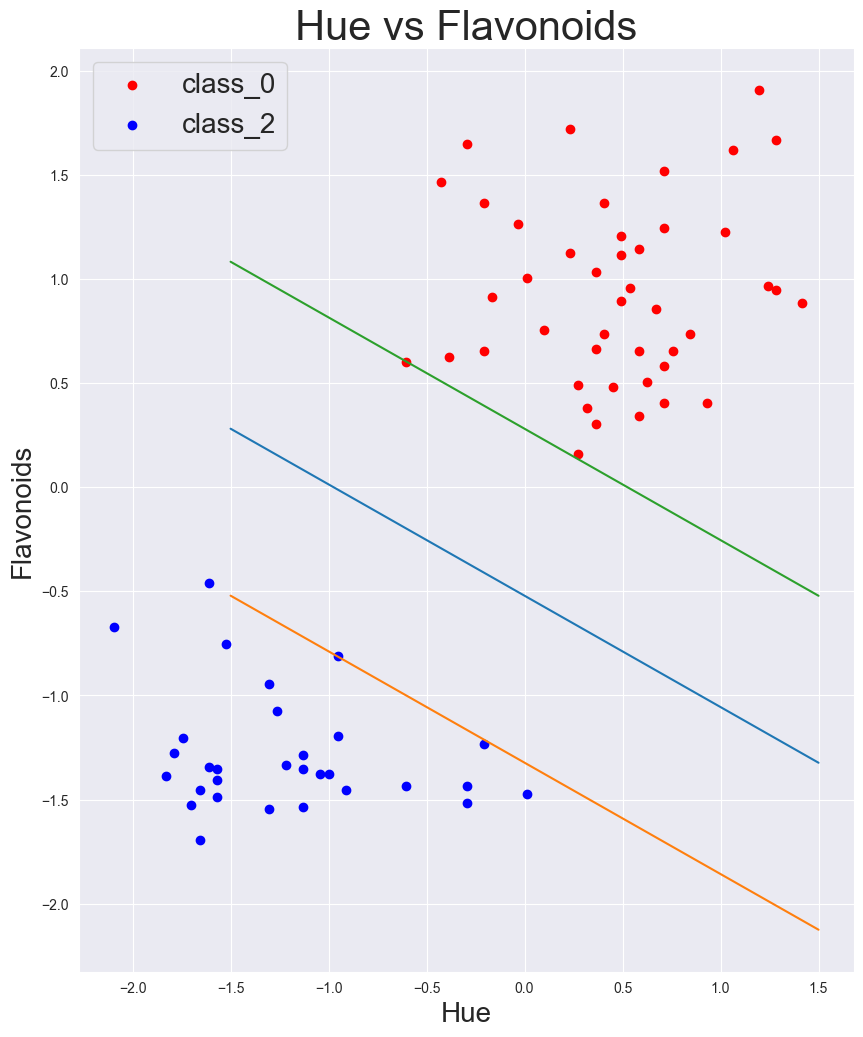

In [104]:
fig, ax = plt.subplots(figsize=(10, 12))

colors = ['red', 'blue', 'green']

hue_train = X_train[hue].values
flavanoids_train = X_train[flavanoids].values

# Loop through from 0 to 2 since labels are encoded in this way in y and through colors at once
for label, color in zip(y_names_new, colors):
    coor = [index for index,i in enumerate(y_train) if  i == int(label.split("_")[1])]
    # plot only those data rows where there is data according to actual label
    ax.scatter(hue_train[coor],
             flavanoids_train[coor],
             label=label,
             c=color)


ax.set_title('Hue vs Flavonoids', fontsize=30)
ax.set_xlabel('Hue', fontsize=20)
ax.set_ylabel('Flavonoids', fontsize=20)


w = lin_svc_2.coef_[0]
b = lin_svc_2.intercept_[0]
a = -w[0]/w[1]
x_points = np.linspace(-1.5, 1.5)
y_points = a * x_points - (b/w[1])
ax.plot(x_points, y_points)

margin = 1/np.sqrt(np.sum(lin_svc_2.coef_ ** 2))
y_points_down = y_points - np.sqrt(1 + a ** 2) * margin
y_points_up = y_points + np.sqrt(1 + a ** 2) * margin
ax.plot(x_points, y_points_down)
ax.plot(x_points, y_points_up)

ax.legend(loc='upper left', fontsize=20)
plt.show()

The C parameter is for SVM opitmization. When we have large amount of data we expect some misclassification on training data.
With large values of C paramter we choose a smaller-margin hyperplane. In this case the classification would be better.
When we choosed 0.1 (i assume) we dirertly made lower the classification correction margin.  (10% miss)

2.) Linear SVC but non-linear separation
create a dataset with the following: X, y = make_circles(n_samples=100, noise=0.075, random_state=0)

perform the same steps just as in the previous exercise and use the linear kernel for the SVC

since linear SVC cannot do non-linear separation, you will need to do some workaround, for example adding polynomial features (find the simpest combination for this dataset)

write down with your own words in few sentences how the support vector machine works

* Here are some hints:
  -use PolynomialFeatures on the two input features, if you omit the bias, it will be with shape (100,9)
  -scale the input features
  -train SVC on the new, transformed data
  -visualization can be made in the original feature space, so (x1, x2), for this:
      -create a meshgrid on the original feature space that will be used for visualization
      -transform this grid to the space where you have the new, transformed data (use the same PolynomialFeatures() function)
      -scale this too, since you already scaled the features
      -get the coefs from SVC (w) and perform z=w*x+b, store this for every grid points
      -after reshaping arrays you should be able to get this z on the original (x1, x2) and you are able to do for example a contourplot with levels showing -1, 1 margins and the z=0.

* Other possible solution is made by the built in decision function of the SVM, but this also needs the transformed grid that is made for visualization.

*  In addition, there is another solution with the use of kernel poly in SVC, but then you need to set degree=3. A meshgrid for visualization is needed here, too. At every grid points you can get a prediction that will act as the variable z in the previous solution.

In [105]:
X, y = datasets.make_circles(n_samples=100, noise=0.075, random_state=0)

In [106]:
# Scale data
X = (X - X.mean(0))/X.std(0)
X

array([[-1.49722371, -0.1840883 ],
       [-0.06128923, -1.10356244],
       [ 1.46734836,  0.30620425],
       [ 0.96755421,  0.63318975],
       [-1.32637239, -0.00698643],
       [ 0.8673554 , -0.71874853],
       [-0.64399903,  1.17702779],
       [-1.18946893,  0.21084278],
       [ 1.06869631,  0.64428993],
       [ 0.9108768 , -0.65779294],
       [ 1.04365671,  0.56710912],
       [ 0.70810342, -1.15174178],
       [-1.05166079, -0.53826645],
       [ 0.11752688,  1.6851484 ],
       [ 0.82461208,  1.21230364],
       [-1.26974937, -0.8098084 ],
       [-1.39456519,  0.65572274],
       [-1.44084762,  0.13074143],
       [-0.7259383 , -1.29367493],
       [ 0.94908701,  1.30437893],
       [ 1.12222533, -1.04732825],
       [ 0.14905999,  1.2119315 ],
       [ 1.33366582,  0.77472676],
       [-1.12135003,  0.59509506],
       [ 1.38170736, -1.02251073],
       [ 1.60790721, -0.53538638],
       [ 1.01122604,  1.01640859],
       [ 1.30797223, -0.34022333],
       [-0.61697665,

In [107]:
y

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

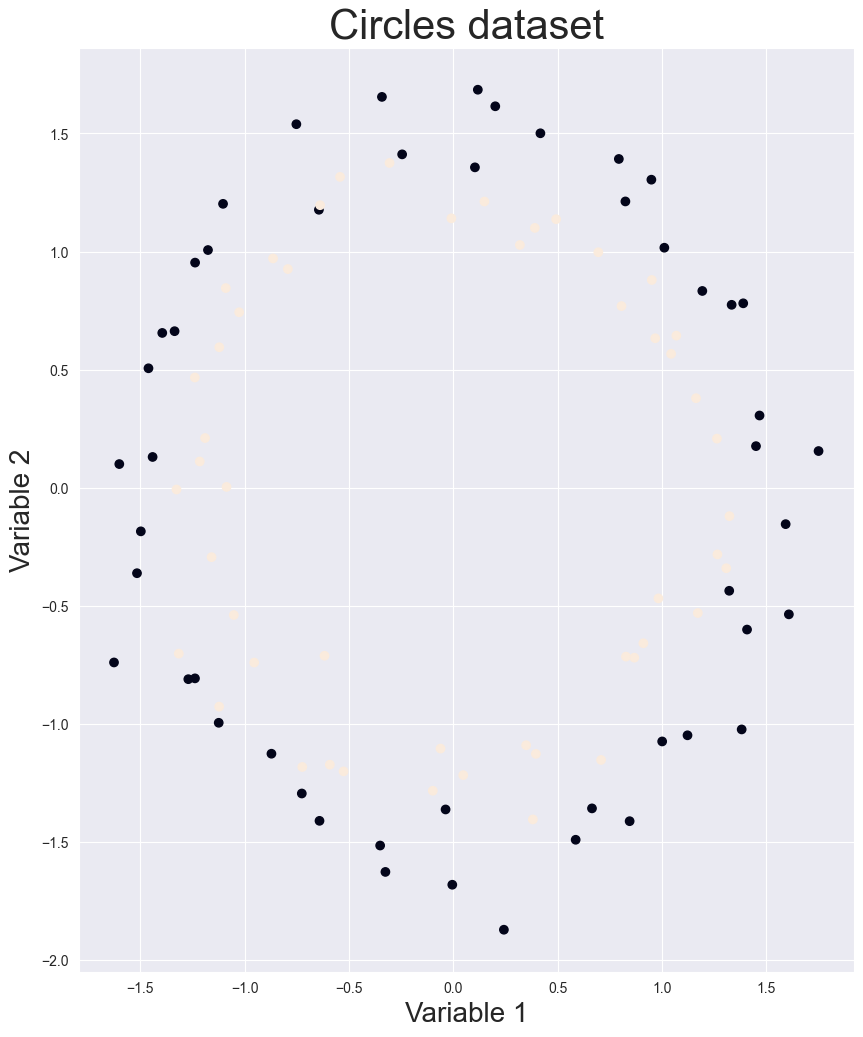

In [108]:
fig, ax = plt.subplots(figsize=(10, 12))

# Loop through from 0 to 2 since labels are encoded in this way in y and through colors at once
ax.scatter(X[:, 0],
           X[:, 1],
           c=y)


ax.set_title('Circles dataset', fontsize=30)
ax.set_xlabel('Variable 1', fontsize=20)
ax.set_ylabel('Variable 2', fontsize=20)

plt.show()

In [109]:
# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

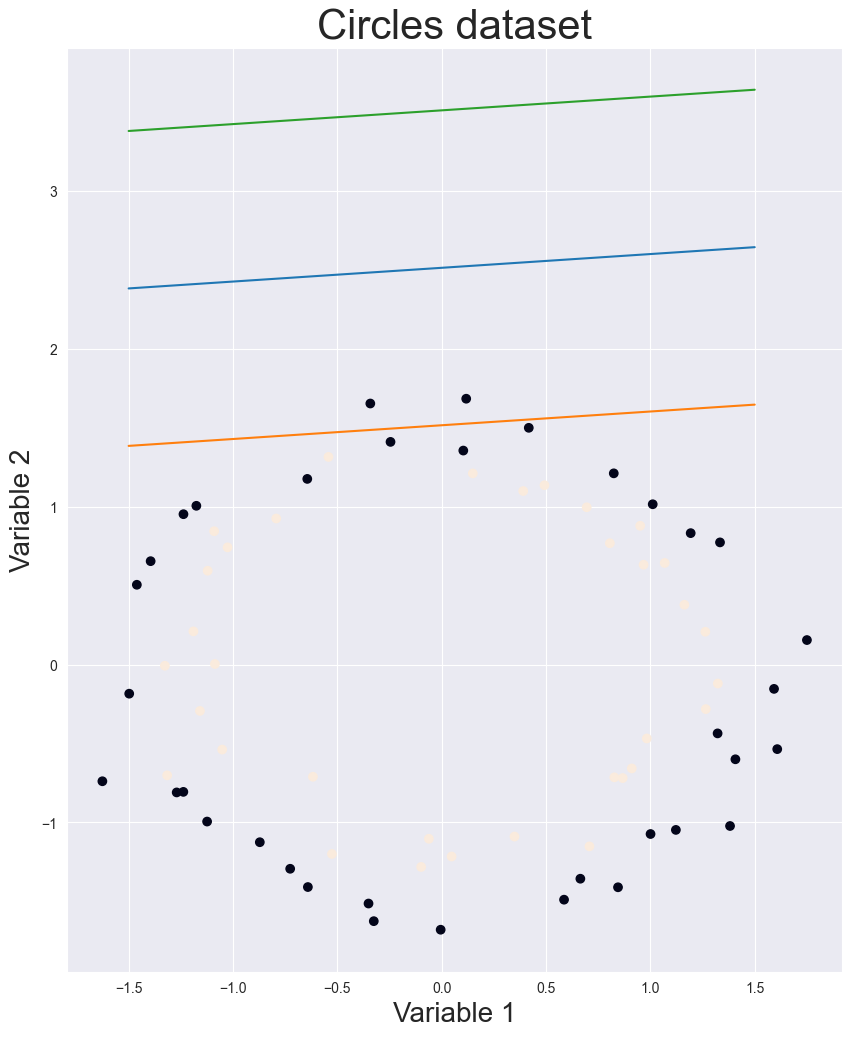

In [110]:
# Create linear svc object when C is 1
lin_svc3 = SVC(kernel='linear', C=0.1)
lin_svc3.fit(X_train, y_train)

# Plot decision bounderias and margins
fig, ax = plt.subplots(figsize=(10, 12))

# Loop through from 0 to 2 since labels are encoded in this way in y and through colors at once
ax.scatter(X_train[:, 0],
           X_train[:, 1],
           c=y_train)


ax.set_title('Circles dataset', fontsize=30)
ax.set_xlabel('Variable 1', fontsize=20)
ax.set_ylabel('Variable 2', fontsize=20)


w = lin_svc3.coef_[0]
b = lin_svc3.intercept_[0]
a = -w[0]/w[1]
x_points = np.linspace(-1.5, 1.5)
#y_points = -(w[0]/w[1])*x_points-b/w[1]
y_points = a * x_points - (b/w[1])
ax.plot(x_points, y_points)

margin = 1/np.sqrt(np.sum(lin_svc.coef_ ** 2))
y_points_down = y_points - np.sqrt(1 + a ** 2) * margin
y_points_up = y_points + np.sqrt(1 + a ** 2) * margin
ax.plot(x_points, y_points_down)
ax.plot(x_points, y_points_up)

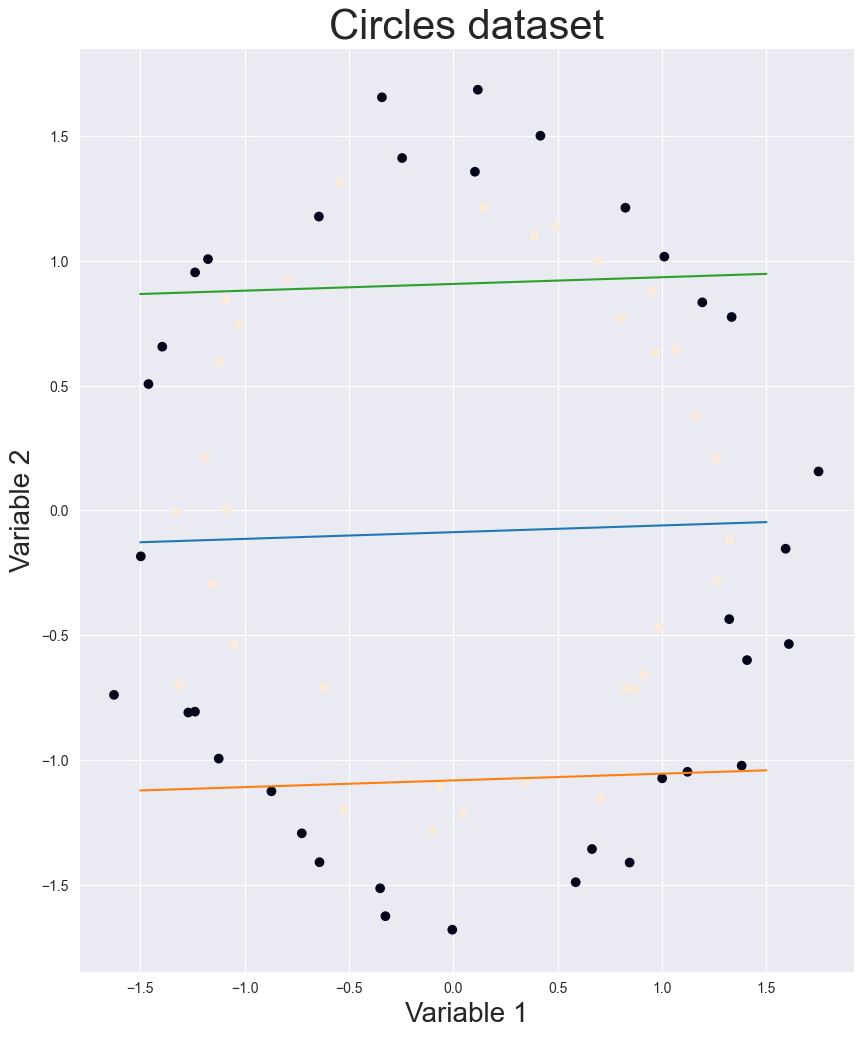

In [111]:
# Create linear svc object when C is 1000
lin_svc4 = SVC(kernel='linear', C=1000)
lin_svc4.fit(X_train, y_train)

# Plot decision bounderias and margins
fig, ax = plt.subplots(figsize=(10, 12))

# Loop through from 0 to 2 since labels are encoded in this way in y and through colors at once
ax.scatter(X_train[:, 0],
           X_train[:, 1],
           c=y_train)


ax.set_title('Circles dataset', fontsize=30)
ax.set_xlabel('Variable 1', fontsize=20)
ax.set_ylabel('Variable 2', fontsize=20)


w = lin_svc4.coef_[0]
b = lin_svc4.intercept_[0]
a = -w[0]/w[1]
x_points = np.linspace(-1.5, 1.5)
#y_points = -(w[0]/w[1])*x_points-b/w[1]
y_points = a * x_points - (b/w[1])
ax.plot(x_points, y_points)

margin = 1/np.sqrt(np.sum(lin_svc.coef_ ** 2))
y_points_down = y_points - np.sqrt(1 + a ** 2) * margin
y_points_up = y_points + np.sqrt(1 + a ** 2) * margin
ax.plot(x_points, y_points_down)
ax.plot(x_points, y_points_up)

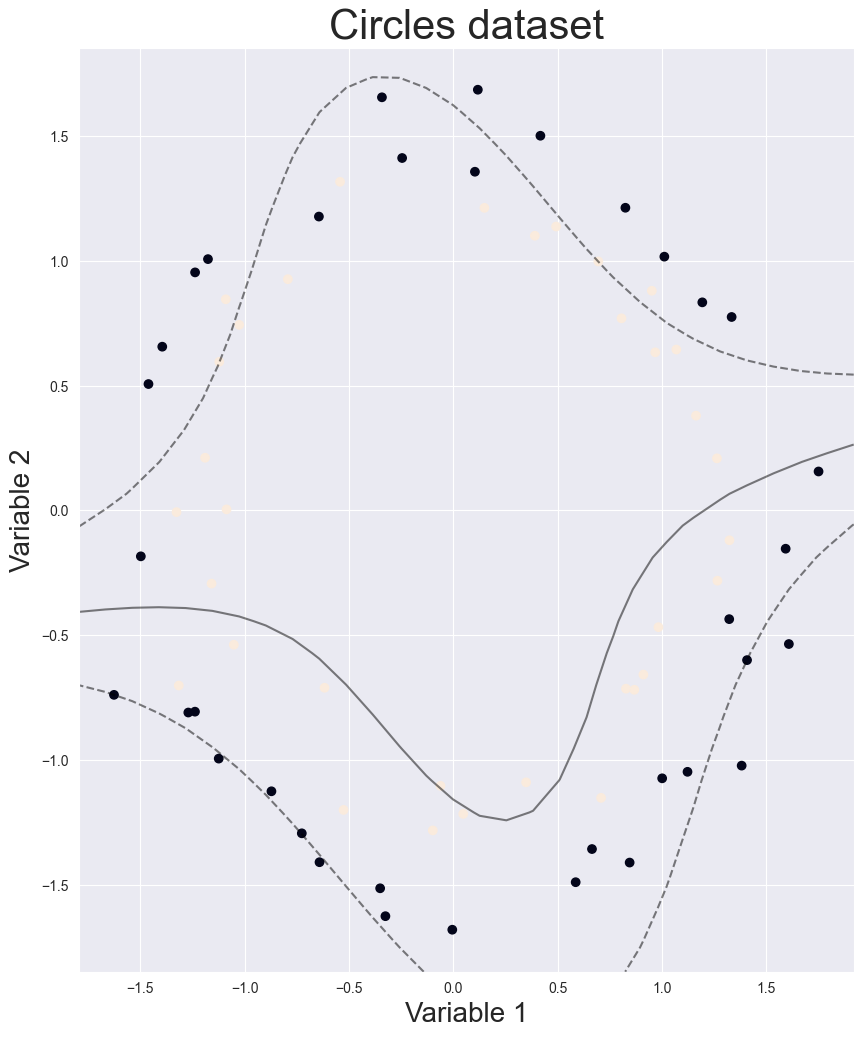

In [112]:
# Polynomial feature SVC
poly_svc = SVC(kernel='poly', degree=3, C=1)
poly_svc.fit(X_train, y_train)


fig, ax = plt.subplots(figsize=(10, 12))

# Loop through from 0 to 2 since labels are encoded in this way in y and through colors at once
ax.scatter(X_train[:, 0],
           X_train[:, 1],
           c=y_train)


ax.set_title('Circles dataset', fontsize=30)
ax.set_xlabel('Variable 1', fontsize=20)
ax.set_ylabel('Variable 2', fontsize=20)

# Extract X and Y axis limits
x_lim = ax.get_xlim()
y_lim = ax.get_ylim()

# Create a meshgrid
x_points = np.linspace(x_lim[0], x_lim[1], 30)
y_points = np.linspace(y_lim[0], y_lim[1], 30)
Y_mesh, X_mesh = np.meshgrid(y_points, x_points)
xy = np.vstack([X_mesh.ravel(), Y_mesh.ravel()]).T
P = poly_svc.decision_function(xy).reshape(X_mesh.shape)

ax.contour(X_mesh, Y_mesh, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

# 3.) Load the dataset from 2 weeks ago and build/evaluate the SVC with default settings
you need to build a classifier that predicts the wine quality. It is based on a score from 0-10, but you need to split it into two classes with the treshold 6.5. Values below should be 0, above 1.

data can be downloaded from this site: https://archive.ics.uci.edu/ml/datasets/Wine+Quality (csv file also attached). Use the winequality-white.csv for this time.

train the SVM classifier (SVC in sklearn API) on every second sample (not first 50% of the data (!), use every second line) and generate (probabilistic) prediction for the samples that were not used during the training

build default SVC, but set it to predict probabilities

plot the ROC curve and calculate the confusion matrix for the predictions

how good is the performance of the model? What are your experiences?

In [113]:
wine_df = pd.read_csv("data/winequality-white.csv",sep=";",header=0)
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [114]:
wine_df["quality"] = wine_df["quality"].apply(lambda x: 1  if x > 6.5 else 0)
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


In [115]:
def getting_train_val(dataframe, interval=2):
    train = dataframe[::interval]
    test = dataframe[~dataframe.index.isin(dataframe[::interval].index)].dropna()
    return train, test

In [116]:
X_train, X_test = getting_train_val(wine_df.drop(columns=['quality']))
y_train, y_test = getting_train_val(wine_df[['quality']])

In [117]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, auc

In [118]:
clf_def = make_pipeline(SVC(gamma='auto',probability=True))
clf_def.fit(X_train.values, y_train.values)
y_pred_svm_def = clf_def.predict_proba(X_test.values)
y_pred_svm_def

C:\programing\python_program_for_biologist\Data_mining_and_machine_learning\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0.8771792 , 0.1228208 ],
       [0.86873915, 0.13126085],
       [0.86877965, 0.13122035],
       ...,
       [0.69017584, 0.30982416],
       [0.89885417, 0.10114583],
       [0.75622028, 0.24377972]])

In [119]:
confusion_matrix(y_pred=y_pred_svm_def[:,1] > 0.5, y_true=y_test)

array([[1850,   69],
       [ 393,  137]], dtype=int64)

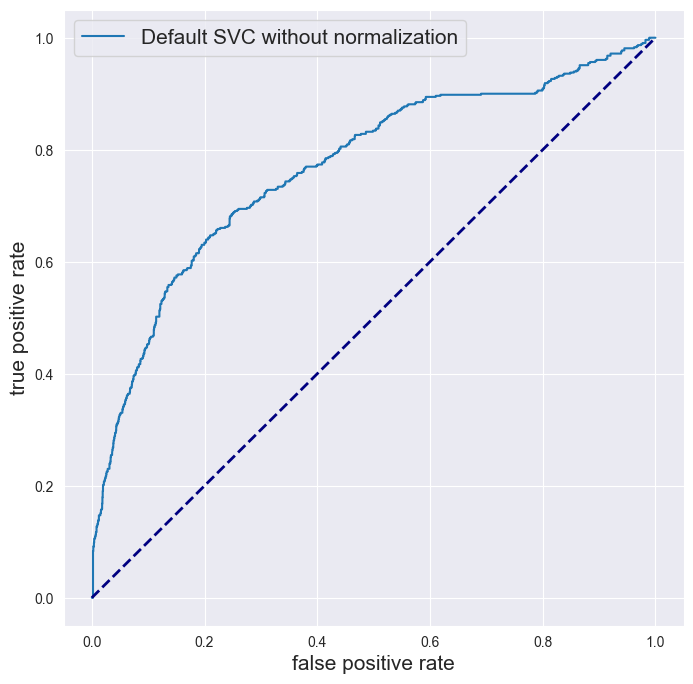

In [120]:
# Plot ROC curve (not normalized)
plt.figure(figsize=(8, 8))
fpr2, tpr2, _ = roc_curve(y_test, y_pred_svm_def[:,1])

plt.plot(fpr2, tpr2, label='Default SVC without normalization')
plt.legend(fontsize=15)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel('false positive rate', fontsize=15)
plt.ylabel('true positive rate', fontsize=15)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()

The prediction is not the best. I think It is because we are not scaled the data.

In [121]:
clf_def_norm = make_pipeline(StandardScaler(), SVC(gamma='auto',probability=True))
clf_def_norm.fit(X_train.values, y_train.values)
y_pred_svm_def_norm = clf_def_norm.predict_proba(X_test.values)
y_pred_svm_def_norm

C:\programing\python_program_for_biologist\Data_mining_and_machine_learning\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0.90602587, 0.09397413],
       [0.89116926, 0.10883074],
       [0.87652485, 0.12347515],
       ...,
       [0.8639693 , 0.1360307 ],
       [0.91304492, 0.08695508],
       [0.6705346 , 0.3294654 ]])

In [122]:
confusion_matrix(y_pred=y_pred_svm_def_norm[:,1] > 0.5, y_true=y_test)

array([[1843,   76],
       [ 334,  196]], dtype=int64)

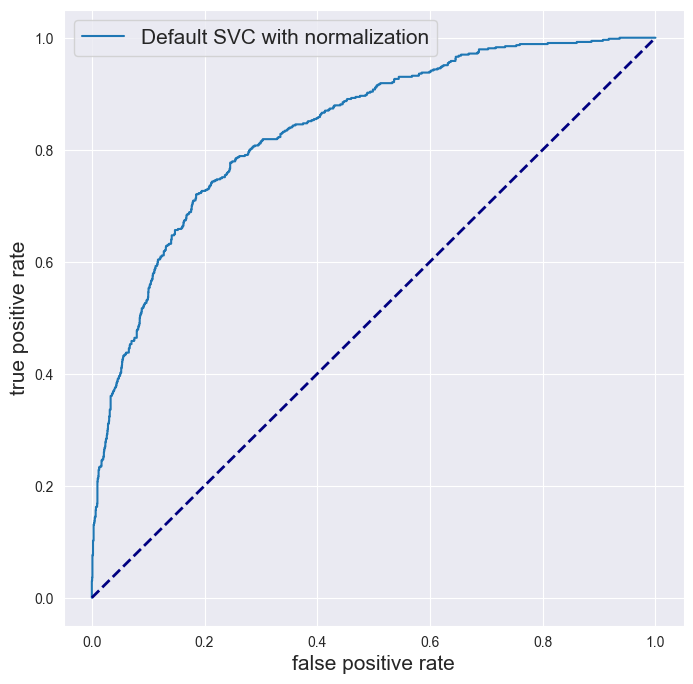

In [123]:
# Plot ROC curve (not normalized)
plt.figure(figsize=(8, 8))
fpr2, tpr2, _ = roc_curve(y_test, y_pred_svm_def_norm[:,1])

plt.plot(fpr2, tpr2, label='Default SVC with normalization')
plt.legend(fontsize=15)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel('false positive rate', fontsize=15)
plt.ylabel('true positive rate', fontsize=15)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()

It's much better after scaling the data

In [124]:
clf_def_linear = make_pipeline(StandardScaler(), SVC(kernel="linear",probability=True))
clf_def_linear.fit(X_train.values, y_train.values)
y_pred_svm_def_norm_lin = clf_def_linear.predict_proba(X_test.values)
y_pred_svm_def_norm_lin

C:\programing\python_program_for_biologist\Data_mining_and_machine_learning\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0.93648247, 0.06351753],
       [0.7029217 , 0.2970783 ],
       [0.81063104, 0.18936896],
       ...,
       [0.80733047, 0.19266953],
       [0.90929502, 0.09070498],
       [0.72537464, 0.27462536]])

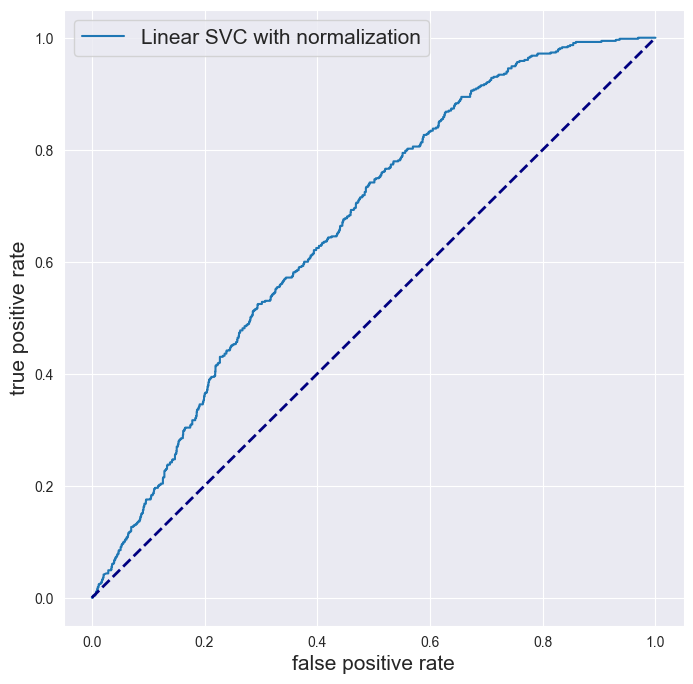

In [125]:
confusion_matrix(y_pred=y_pred_svm_def_norm_lin[:, 1] > 0.5, y_true=y_test)
# Plot ROC curve (not normalized)
plt.figure(figsize=(8, 8))
fpr2, tpr2, _ = roc_curve(y_test, y_pred_svm_def_norm_lin[:, 1])

plt.plot(fpr2, tpr2, label='Linear SVC with normalization')
plt.legend(fontsize=15)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel('false positive rate', fontsize=15)
plt.ylabel('true positive rate', fontsize=15)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()

In [126]:
clf_def_poly = make_pipeline(StandardScaler(), SVC(kernel="poly",probability=True))
clf_def_poly.fit(X_train.values, y_train.values)
y_pred_svm_def_norm_poly = clf_def_poly.predict_proba(X_test.values)
y_pred_svm_def_norm_poly

C:\programing\python_program_for_biologist\Data_mining_and_machine_learning\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0.82753434, 0.17246566],
       [0.80620475, 0.19379525],
       [0.81908873, 0.18091127],
       ...,
       [0.80869981, 0.19130019],
       [0.82810823, 0.17189177],
       [0.53606833, 0.46393167]])

In [127]:
confusion_matrix(y_pred=y_pred_svm_def_norm_poly[:, 1] > 0.5, y_true=y_test)

array([[1882,   37],
       [ 444,   86]], dtype=int64)

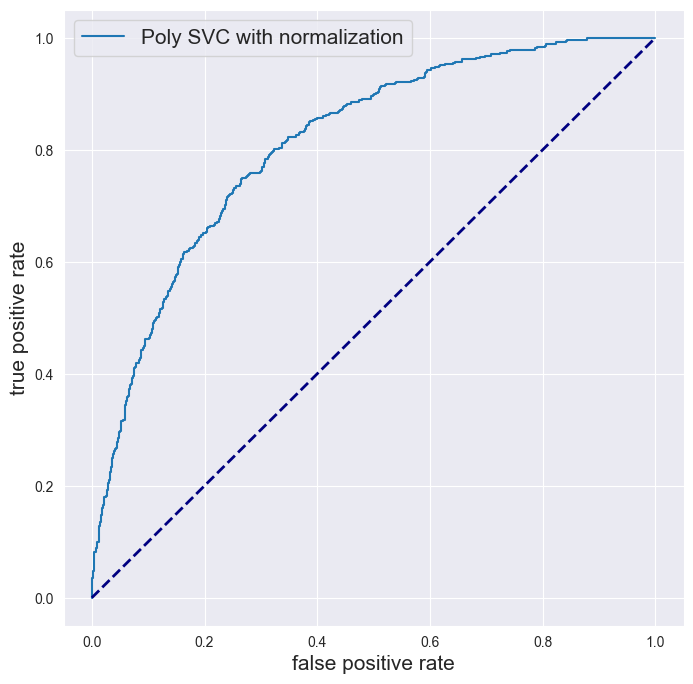

In [128]:
# Plot ROC curve (not normalized)
plt.figure(figsize=(8, 8))
fpr2, tpr2, _ = roc_curve(y_test, y_pred_svm_def_norm_poly[:, 1])

plt.plot(fpr2, tpr2, label='Poly SVC with normalization')
plt.legend(fontsize=15)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel('false positive rate', fontsize=15)
plt.ylabel('true positive rate', fontsize=15)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()

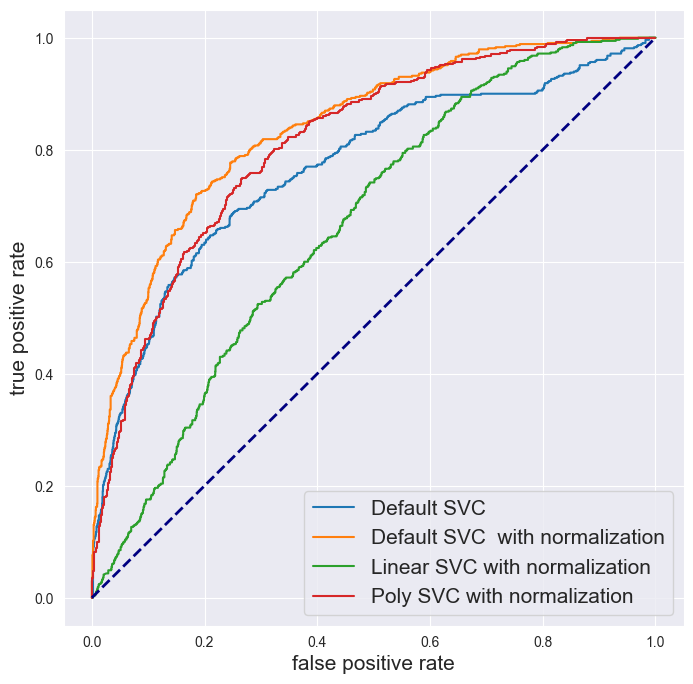

In [129]:
plt.figure(figsize=(8, 8))
fpr1, tpr1, _ = roc_curve(y_test, y_pred_svm_def[:,1])
fpr2, tpr2, _ = roc_curve(y_test, y_pred_svm_def_norm[:,1])
fpr3, tpr3, _ = roc_curve(y_test, y_pred_svm_def_norm_lin[:, 1])
fpr4, tpr4, _ = roc_curve(y_test, y_pred_svm_def_norm_poly[:, 1])


plt.plot(fpr1, tpr1, label='Default SVC')
plt.plot(fpr2, tpr2, label='Default SVC  with normalization')
plt.plot(fpr3, tpr3, label='Linear SVC with normalization')
plt.plot(fpr4, tpr4, label='Poly SVC with normalization')
plt.legend(fontsize=15)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel('false positive rate', fontsize=15)
plt.ylabel('true positive rate', fontsize=15)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()

Normalized Default SVC was the best in all.

# 5.) Split the data randomly to 3 parts: 70% train, 15% validation, 15% test data and tune hyperparameters
prepare data as described in the title, then scale all input based on the training set (IMPORTANT: you can use ONLY the training data for scaling, otherwise the model will be fake (!) and we cannot give you points)
select your best performing SVC model from the previous exercise
check the behaviour of the SVC by modifying at least 3 of its hyperparameters (C, gamma, ...) and plot the AUC value vs the modified parameter (logscale may be better for visualization)
create plots (at least 2) that shows the train, val and test accuracy based on a given hyperparameter's different values. Is it a good idea to rely on validation data when tuning hyperparameter in this case?

In [130]:
x, x_test, y, y_test = train_test_split(wine_df.drop(columns=['quality']),wine_df[['quality']],test_size=0.15,train_size=0.85)
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.25,train_size =0.75)

In [131]:
def train_validate_test_split(df, train_percent=.6, validate_percent=.2, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]]
    test = df.iloc[perm[validate_end:]]
    return train, validate, test

In [132]:
train, validate, test = train_validate_test_split(wine_df,train_percent=0.7,validate_percent=0.15)

In [133]:
X_train = train.drop(columns=['quality'])
y_train = train[['quality']]
X_validate = validate.drop(columns=['quality'])
y_validate = validate[['quality']]
X_test = train.drop(columns=['quality'])
y_test = train[['quality']]


In [134]:
X_train_norm = standardscaler.fit_transform(X_train)
X_test_norm = (X_test - X_train.mean())/X_train.std()
X_validate_norm = (X_validate - X_train.mean())/X_train.std()

In [135]:
clf_splitted = make_pipeline(StandardScaler(), SVC(gamma='auto',probability=True))
clf_splitted.fit(X_train_norm, y_train.values)
y_pred_splitted = clf_splitted.predict_proba(X_test_norm)
y_pred_splitted

C:\programing\python_program_for_biologist\Data_mining_and_machine_learning\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\programing\python_program_for_biologist\Data_mining_and_machine_learning\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([[0.87931703, 0.12068297],
       [0.7678495 , 0.2321505 ],
       [0.8601478 , 0.1398522 ],
       ...,
       [0.93630805, 0.06369195],
       [0.91259414, 0.08740586],
       [0.90207848, 0.09792152]])

In [136]:
confusion_matrix(y_pred=y_pred_splitted[:, 1] > 0.5, y_true=y_test)

array([[2578,  104],
       [ 438,  308]], dtype=int64)

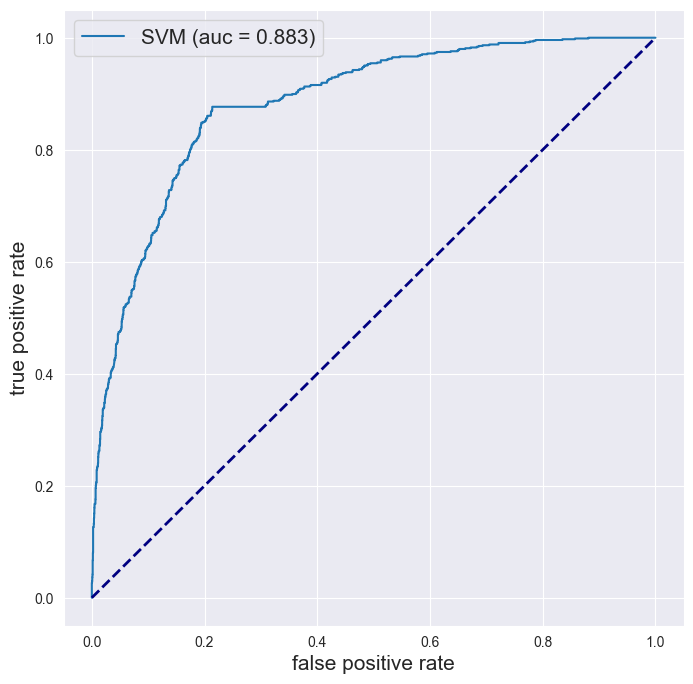

In [137]:
# Plot ROC curve (not normalized)
plt.figure(figsize=(8, 8))
fpr2, tpr2, _ = roc_curve(y_test, y_pred_splitted[:, 1])
auc_svm = auc(fpr2, tpr2)

plt.plot(fpr2, tpr2, label='SVM (auc = %0.3f)' % auc_svm)
plt.legend(fontsize=15)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel('false positive rate', fontsize=15)
plt.ylabel('true positive rate', fontsize=15)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()

In [138]:
clf_splitted_c100 = make_pipeline(StandardScaler(), SVC(gamma='auto',probability=True, C=100))
clf_splitted_c100.fit(X_train_norm, y_train.values)
y_pred_splitted_c100 = clf_splitted_c100.predict_proba(X_test_norm)
y_pred_splitted_c100

C:\programing\python_program_for_biologist\Data_mining_and_machine_learning\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\programing\python_program_for_biologist\Data_mining_and_machine_learning\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([[0.98227329, 0.01772671],
       [0.36518369, 0.63481631],
       [0.70210673, 0.29789327],
       ...,
       [0.99829305, 0.00170695],
       [0.99096398, 0.00903602],
       [0.91508875, 0.08491125]])

In [139]:
clf_splitted_linear = make_pipeline(StandardScaler(), SVC(gamma="auto",kernel="linear",probability=True))
clf_splitted_linear.fit(X_train_norm, y_train.values)
y_pred_splitted_linear = clf_splitted_linear.predict_proba(X_test_norm)
y_pred_splitted_linear

C:\programing\python_program_for_biologist\Data_mining_and_machine_learning\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\programing\python_program_for_biologist\Data_mining_and_machine_learning\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([[0.64636941, 0.35363059],
       [0.83984271, 0.16015729],
       [0.85174139, 0.14825861],
       ...,
       [0.86327427, 0.13672573],
       [0.91473008, 0.08526992],
       [0.84217912, 0.15782088]])

In [140]:
clf_splitted_poly = make_pipeline(StandardScaler(), SVC(gamma="auto",kernel="poly",probability=True))
clf_splitted_poly.fit(X_train_norm, y_train.values)
y_pred_splitted_poly = clf_splitted_poly.predict_proba(X_test_norm)
y_pred_splitted_poly

C:\programing\python_program_for_biologist\Data_mining_and_machine_learning\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\programing\python_program_for_biologist\Data_mining_and_machine_learning\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([[0.77068747, 0.22931253],
       [0.79109111, 0.20890889],
       [0.83267868, 0.16732132],
       ...,
       [0.88154674, 0.11845326],
       [0.91499563, 0.08500437],
       [0.8255351 , 0.1744649 ]])

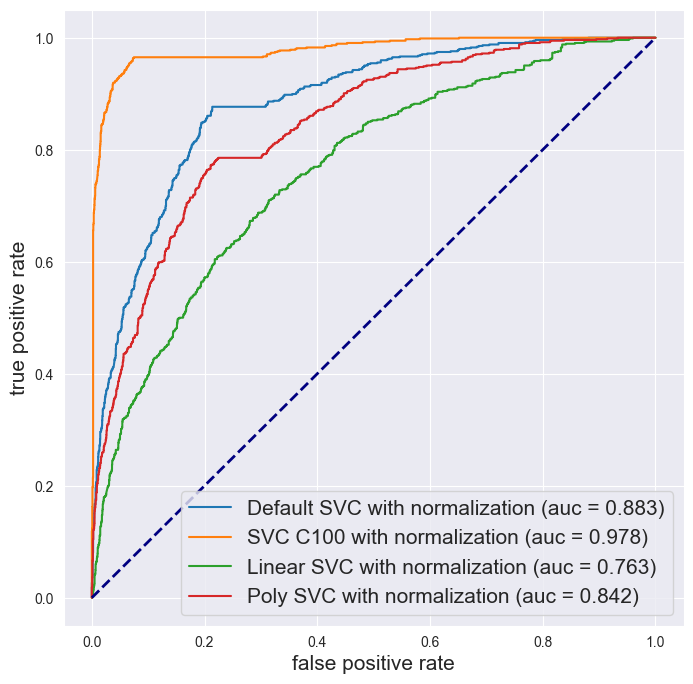

In [141]:
plt.figure(figsize=(8, 8))
fpr1, tpr1, _ = roc_curve(y_test, y_pred_splitted[:,1])
fpr2, tpr2, _ = roc_curve(y_test, y_pred_splitted_c100[:,1])
fpr3, tpr3, _ = roc_curve(y_test, y_pred_splitted_linear[:, 1])
fpr4, tpr4, _ = roc_curve(y_test, y_pred_splitted_poly[:, 1])

auc_splitted = auc(fpr1, tpr1)
auc_c1000 = auc(fpr2, tpr2)
auc_scale = auc(fpr3, tpr3)
auc_poly = auc(fpr4, tpr4)


plt.plot(fpr1, tpr1, label='Default SVC with normalization (auc = %0.3f)' % auc_splitted)
plt.plot(fpr2, tpr2, label='SVC C100 with normalization (auc = %0.3f)' % auc_c1000)
plt.plot(fpr3, tpr3, label='Linear SVC with normalization (auc = %0.3f)' % auc_scale)
plt.plot(fpr4, tpr4, label='Poly SVC with normalization (auc = %0.3f)' % auc_poly)
plt.legend(fontsize=15)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel('false positive rate', fontsize=15)
plt.ylabel('true positive rate', fontsize=15)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()

In [142]:
clf_acc_c100 = make_pipeline(StandardScaler(), SVC(gamma='auto',probability=True, C=100))
clf_acc_c100.fit(X_train_norm, y_train.values)
clf_acc_c100_test = clf_acc_c100.predict_proba(X_test_norm)
clf_acc_c100_val = clf_acc_c100.predict_proba(X_validate_norm)

C:\programing\python_program_for_biologist\Data_mining_and_machine_learning\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\programing\python_program_for_biologist\Data_mining_and_machine_learning\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\programing\python_program_for_biologist\Data_mining_and_machine_learning\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


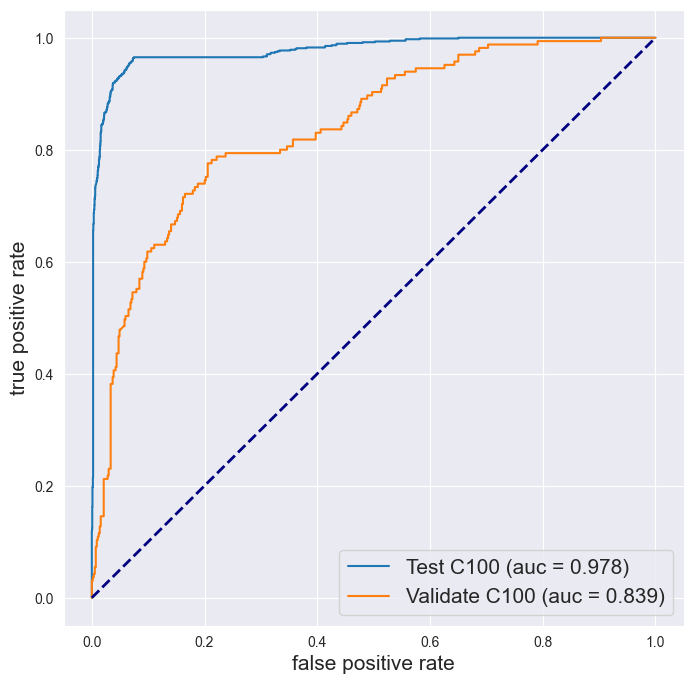

In [143]:
plt.figure(figsize=(8, 8))
fpr1, tpr1, _ = roc_curve(y_test, clf_acc_c100_test[:,1])
fpr2, tpr2, _ = roc_curve(y_validate, clf_acc_c100_val[:, 1])

auc_c100_test = auc(fpr1, tpr1)
auc_c100_val = auc(fpr2, tpr2)

plt.plot(fpr1, tpr1, label='Test C100 (auc = %0.3f)' % auc_c100_test)
plt.plot(fpr2, tpr2, label='Validate C100 (auc = %0.3f)' % auc_c100_val)
plt.legend(fontsize=15)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel('false positive rate', fontsize=15)
plt.ylabel('true positive rate', fontsize=15)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()

In [144]:
clf_acc_poly = make_pipeline(StandardScaler(), SVC(gamma="auto",kernel="poly",probability=True))
clf_acc_poly.fit(X_train_norm, y_train.values)
clf_acc_poly_test = clf_acc_poly.predict_proba(X_test_norm)
clf_acc_poly_val = clf_acc_poly.predict_proba(X_validate_norm)

C:\programing\python_program_for_biologist\Data_mining_and_machine_learning\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\programing\python_program_for_biologist\Data_mining_and_machine_learning\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\programing\python_program_for_biologist\Data_mining_and_machine_learning\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


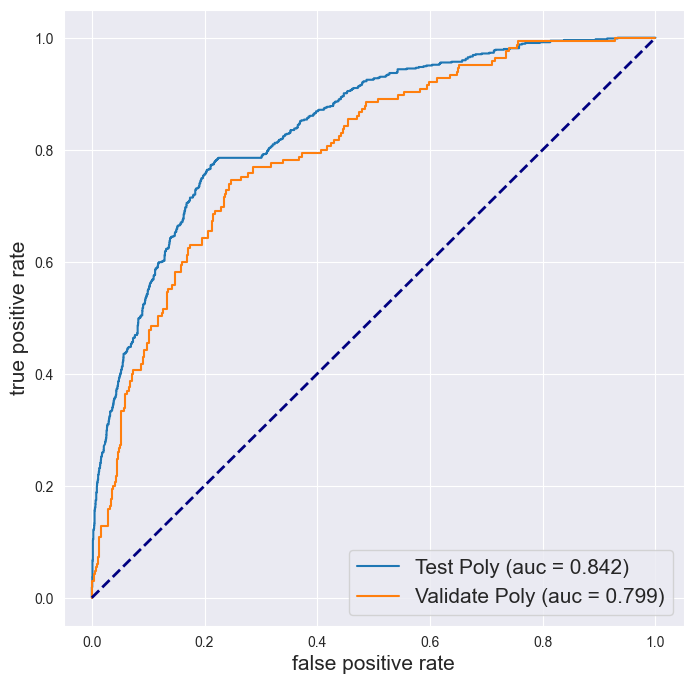

In [145]:
plt.figure(figsize=(8, 8))
fpr1, tpr1, _ = roc_curve(y_test, clf_acc_poly_test[:,1])
fpr2, tpr2, _ = roc_curve(y_validate, clf_acc_poly_val[:, 1])

auc_poly_test = auc(fpr1, tpr1)
auc_poly_val = auc(fpr2, tpr2)

plt.plot(fpr1, tpr1, label='Test Poly (auc = %0.3f)' % auc_poly_test)
plt.plot(fpr2, tpr2, label='Validate Poly (auc = %0.3f)' % auc_poly_val)
plt.legend(fontsize=15)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel('false positive rate', fontsize=15)
plt.ylabel('true positive rate', fontsize=15)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()

The C paramater is not working on small subset of samples (validatation data).
Altough beucause of the kernel is for algorithm type, it not depend on the data size.
I think in this case it is not a good idea to rely on validation data.